## Assigning gender based on first name

A straightforward task in natural language processing is to assign gender based on first name. Social scientists are often interested in gender inequalities and may have a dataset that lists name but not gender, such as a list of journal articles with authors in a study of gendered citation practices. 

Assigning gender based on name is usually done by comparing a given name with the name's gender distribution on official records, such as the US Social Security baby name list. While this works for most names, some names, such as Gershun or Hunna, are too rare to have reliable estimates based on most available official records. Other names, such as Jian or Blake, are common among both men and women. A fourth category of names are those which are dispropriately one gender or another, but do have non-trivial numbers of a different gender, such as Cody or Kyle. For both these names and androgynous names, their are often generational differences in the gendered distribution. 

The most efficient way to gender names in Python is with the `gender_guesser` library, which is based on Jörg Michael's multinational list of more than 48,000 names. The first time you use the library, you may need to install it:

`%pip install gender_guesser`

The `gender_guesser` library is set up so that first you import the gender function and then create a detector. In my case, the detector is named `d` and one parameter is passed, which instructors the detector to ignore capitalization.

In [3]:
import gender_guesser.detector as gender

In [4]:
d = gender.Detector(case_sensitive=False)

When passed a name, the detector's `get_gender` returns either 'male', 'female', 'mostly_male', 'mostly_female', 'andy' (for androgenous names), or 'unknown' (for names not in the dataset).

In [5]:
d.get_gender("Barack")

'male'

In [6]:
d.get_gender("Theresa")

'female'

In [7]:
d.get_gender("JAMIE")

'mostly_female'

In [8]:
d.get_gender("sidney")

'mostly_male'

In [9]:
d.get_gender("Tal")

'andy'

In almost all cases, you will want to analyze a large list of names, rather than a single name. For example, the University of North Carolina, Chapel Hill makes available salary information on employees. The dataset includes name, department, position salary and years of employment, but not gender.  

In [11]:
import pandas as pd

df = pd.read_csv("data/unc_salaries.csv")

In [12]:
df.head(10)

,First Name,Last Name,Full Name,Department,Position,Salary,Service (yrs)
0,YASMINA,ABAJAS,"ABAJAS, YASMINA L",Peds-Hematology/Oncology,Assistant Professor,146361,3
1,JEFFERY,ABARBANELL,"ABARBANELL, JEFFERY S",Kenan-Flagler Bus Sch,Associate Professor,186430,20
2,PENELOPE,ABERNATHY,"ABERNATHY, PENELOPE M",School of Media and Journalism,Professor,175490,10
3,BLANCHE,ABLE,"ABLE, BLANCHE H",School of Education Deans Ofc,Associate Professor,115183,25
4,JONATHAN,ABRAMOWITZ,"ABRAMOWITZ, JONATHAN S",Psychology and Neuroscience,Professor,127834,12
5,JACOB,ACTON,"ACTON, JACOB D",General Anesthesia,Assistant Professor,231266,3
6,LINDA,ADAIR,"ADAIR, LINDA S",Nutrition - Ops,Professor,199610,30
7,DAVID,ADALSTEINSSON,"ADALSTEINSSON, DAVID",Mathematics,Associate Professor,102404,19
8,KIRKWOOD,ADAMS,"ADAMS, KIRKWOOD F",Medicine - Cardiology,Associate Professor,145886,35
9,MUKHTAR,ADEM,"ADEM, MUKHTAR",Medicine Hospitalist,Assistant Professor,212529,11


A column with name-based gender assignment can be created by applying `d.get_gender` to the first name column.

In [13]:
df["Gender"] = df["First Name"].apply(d.get_gender)

In [17]:
df["Gender"].value_counts(normalize=True)

male             0.466294
female           0.361914
unknown          0.077353
mostly_female    0.039143
andy             0.036036
mostly_male      0.019261
Name: Gender, dtype: float64

For this dataset, the majority of the names can be gendered, while less than ten percent of names are not in the dataset. 

Selecting the rows in the dataframe where gender is unknown and the listing the values can be useful for inspecting cases and evaluating the gender-name assignment process.

In [18]:
cases = df["Gender"] == "unknown"

df[cases]["First Name"].values

array(['KIRKWOOD', 'DURGA', 'ADAORA', 'SUMITHA', 'SUKRIYE', 'HARENDRA',
       'SHIFALI', 'SARAVANAN', 'SREEJA', 'GERSHUN', 'HEMANTH', 'SUN-YUNG',
       'SRIDHAR', 'SAYAN', 'MOHIT', 'HUNNA', 'AYSENIL', 'SOUMYA',
       'SREEKALYANI', 'AADRA', 'NISHANT', 'MONTIKA', 'MIRNELA', 'JAYE',
       'MUGE', 'SHANNELLE', 'YAIZA', 'DELESHA', 'MAGANIZO', 'JEN-YEA',
       'ANUSHA', 'DING-GENG', 'BHISHAMJIT', 'D.', 'LAMECK', 'YAMNIA',
       'FULTON', 'CHARNA', 'JAMA', 'SAYAMINDU', 'GAURAV', 'SUJA',
       'LEISHA', 'VIMAL', 'CHIRAG', 'SREEDHARI', 'MOHANISH', 'VINAYAK',
       'ARAVINDA', 'PRASUN', 'VISHAL', 'KIMON', 'DUSTINE', 'THURSTON',
       'NIANBO', 'RAGHUVAR', 'JOAQUIN', 'SHUFA', 'SWATHI', 'SEYEDMORTEZA',
       'TEMITOPE', 'ACHILLES', 'MARTILIAS', 'KETURAH', 'LISIANE', 'JODON',
       'M', 'JAN-MICHAEL', 'HELYNE', 'DEEN', 'KRISTALYN', 'MARILIE',
       'YANZHE', 'DOREY', 'TRENETTE', 'NILUKSHI', 'MARIAELISA',
       'BIKRAMJIT', 'RAJDEEP', 'JUNEKO', 'ISIN', 'GAORAV', 'ZONGCHAO',
       'SUD

My quick interpreation of this list is that it names that are certainly rare in the US, and some are likely transliterated using a non-common English spelling. The name with missing gender are not-random and the process of creating missingness is likely correlated with other variables of interest, such as salary. This might impact a full-analysis of gender patterns, but I'll ignore that in the preliminary analysis.

If you were conducted your analysis in another statistical package, you could export your dataframe with the new gender column.

In [14]:
df.to_csv("unc_salaries_gendered.csv")

You could also produce some summary statistics in your notebook. For example, the pandas `groupby` method can be used to estimate median salary by gender.

In [19]:
df.groupby("Gender")["Salary"].median()

Gender
andy             119863.0
female           126477.0
male             160793.0
mostly_female    134076.5
mostly_male      144457.5
unknown          139217.0
Name: Salary, dtype: float64

Comparing the male and female-coded names, this shows evidence of a large salary gap based on gender. The "mostly" and unknown categories are in the middle, but interesting the androgynous names are associated with the lowest salaries. 

Grouping by gender and position may be useful in understanding the mechanisms that produce the gender gap. I also focus on just the individuals with names that are coded as male or female. 

In [20]:
subset = df["Gender"].isin(["male", "female"])

df[subset].groupby(["Position", "Gender"])["Salary"].median()

Position             Gender
Assistant Professor  female    107055.0
                     male      125419.5
Associate Professor  female    120829.0
                     male      135972.5
Professor            female    165648.0
                     male      190000.0
Name: Salary, dtype: float64

This summary dataframe can also be plotted, which clearly shows that the median salary for male Assistant Professors is higher than the median salary of the higher ranked female Associate Professors.

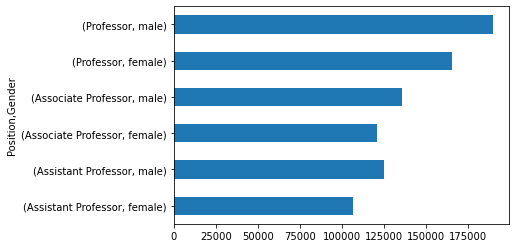

In [22]:
%matplotlib inline

df[subset].groupby(['Position','Gender'])['Salary'].median().plot(kind='barh');

Sometimes the first name will not be it's own field, but included as part of the name column that includes the full name. In that case, you will need to create a function that extracts the first name. 

In this dataframe, the `name` column is the last name, followed by a comma, and then the first name and possibly a middle name or initial. A brief function extracts the first name,

In [23]:
def gender_name(name):
    """
    Extracts and genders first name when the original name is formatted "Last, First M". 
    Assumes a gender.Detector named `d` is already declared. 
    """

    first_name = name.split(", ")[-1]  # grab the slide after the comma
    first_name = first_name.split(" ")[0]  # remove middle name/initial
    gender = d.get_gender(first_name)
    return gender

This function can now be applied to the full name column.

In [24]:
df["Gender"] = df["Full Name"].apply(gender_name)

In [25]:
df["Gender"].value_counts()

male             1501
female           1165
unknown           249
mostly_female     126
andy              116
mostly_male        62
Name: Gender, dtype: int64

The results are the same as original gender column.